In [15]:
import os
import json

import torch
import matplotlib.pyplot as plt
import pandas as pd

import tqdm

from model import FRCNNDetector, DetectedImage
import dataset as DS

In [16]:
classes = ['1', '2', '3', '4', '5', 'blue', 'brown', 'green', 'red', 'yellow', 'parking', 'limit_h', 'limit_speed' ,'14', '15']
model_path = "./saved_models/fasterrcnn_20231119.pt-35"
detector = FRCNNDetector(classes, model_path=model_path)

In [17]:
data_set_path = "./all_data/val"
# test_loader = DS.load_dataset(data_set_path, "target_2048_2448.json")
test_loader = DS.load_dataset(data_set_path, "target_2452_2056.json", batch_size=6)

In [18]:
gts = []
predicts = []
count = 0
with torch.no_grad():
    detector.eval()
    for images, targets in tqdm.tqdm(test_loader):

        for target in targets:
            n_boxes = len(target["boxes"])
            target["scores"] = torch.Tensor([1.]*n_boxes)
        gts.extend(
            [DetectedImage(image, out, classes=classes) for image, out in zip(images, targets)]
        )

        # result = detector(images)
        predicts.extend(detector.predict(images))
        # print(detector(images))
        
        count += 1
        if count==3:
            break
        

  0%|          | 0/31 [00:00<?, ?it/s]

  6%|▋         | 2/31 [00:32<07:44, 16.03s/it]


In [19]:
check_idx = 3

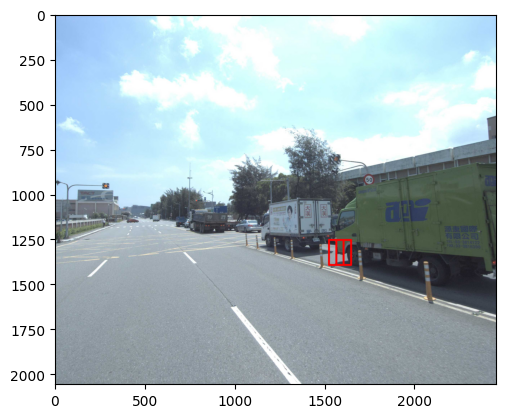

In [10]:
detected_image = predicts[check_idx]
img = detected_image.draw_box("blue", thickness=10, score_thr=.7)
plt.imshow(img)

In [22]:
small_figs = detected_image.fetch("blue")
small_figs

[DetectedInstance(bbox=x0     881
 y0    1065
 x1     960
 y1    1106
 Name: 0, dtype: object, category='blue', score=1.0, _ref_image=tensor([[[148., 148., 148.,  ..., 174., 174., 174.],
          [148., 148., 148.,  ..., 174., 174., 174.],
          [148., 148., 148.,  ..., 174., 174., 174.],
          ...,
          [139., 136., 134.,  ..., 141., 141., 141.],
          [134., 132., 131.,  ..., 140., 140., 140.],
          [129., 127., 128.,  ..., 138., 138., 138.]],
 
         [[185., 185., 185.,  ..., 213., 213., 213.],
          [185., 185., 185.,  ..., 213., 213., 213.],
          [185., 185., 185.,  ..., 213., 213., 213.],
          ...,
          [149., 146., 144.,  ..., 148., 148., 148.],
          [144., 142., 141.,  ..., 147., 147., 147.],
          [139., 137., 138.,  ..., 145., 145., 145.]],
 
         [[237., 237., 237.,  ..., 252., 252., 252.],
          [237., 237., 237.,  ..., 252., 252., 252.],
          [237., 237., 237.,  ..., 252., 252., 252.],
          ...,
      

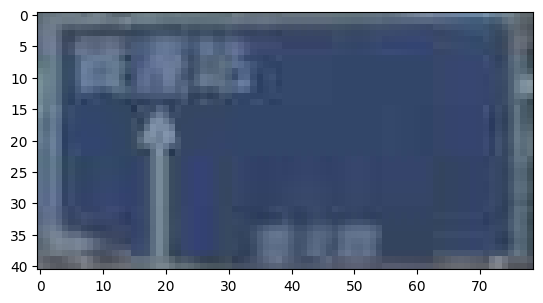

In [25]:
detected_instance = small_figs[0]
the_real_small_fig = detected_instance.image
plt.imshow(the_real_small_fig)

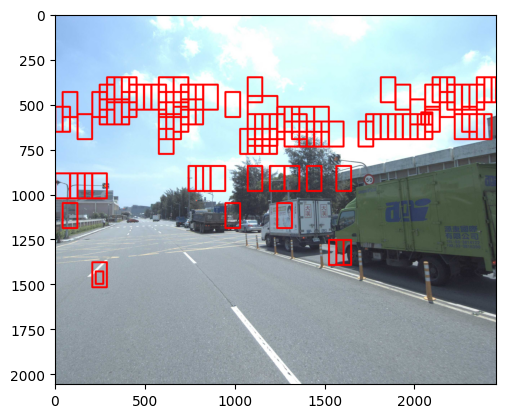

In [11]:
detected_image = predicts[check_idx]
img = detected_image.draw_all_box(thickness=10, score_thr=.7)
plt.imshow(img)

,label,score,x0,y0,x1,y1
0,blue,1.0,881,1065,960,1106
1,parking,1.0,829,1018,840,1042
2,limit_speed,1.0,1714,887,1777,950


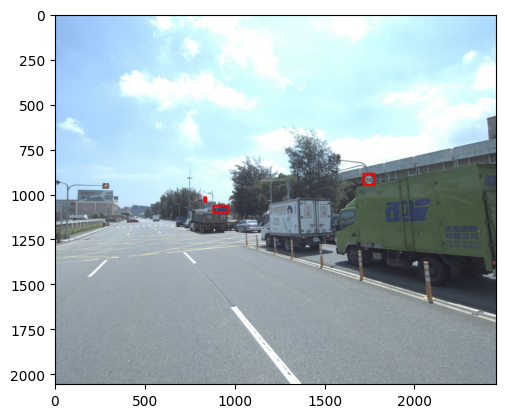

In [14]:
detected_image = gts[check_idx]
img = detected_image.draw_all_box(thickness=10, score_thr=.7)
plt.imshow(img)
detected_image._info

In [13]:
assert False

AssertionError: 

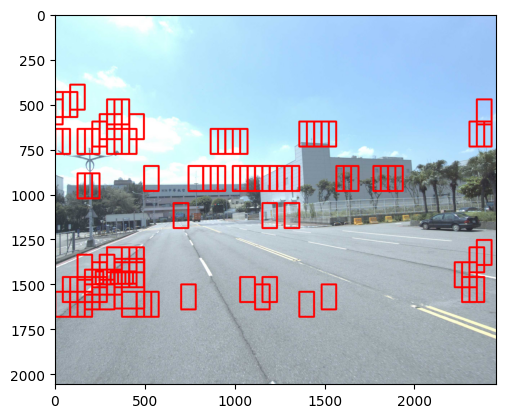

In [ ]:
detected_image = predicts[1]
img = detected_image.draw_box("green", thickness=10, score_thr=.7)
plt.imshow(img)

In [ ]:
detected_image._info

,label,score,x0,y0,x1,y1
0,green,0.922982,1646,392,1728,531
1,green,0.922802,1153,556,1234,695
2,green,0.92278,1194,515,1275,654
3,green,0.922767,1317,474,1399,613
4,green,0.922752,1605,392,1687,531
...,...,...,...,...,...,...
95,green,0.86274,1811,844,1892,983
96,green,0.861244,1112,638,1193,777
97,green,0.860222,1194,597,1275,736
98,green,0.860103,1482,392,1563,531


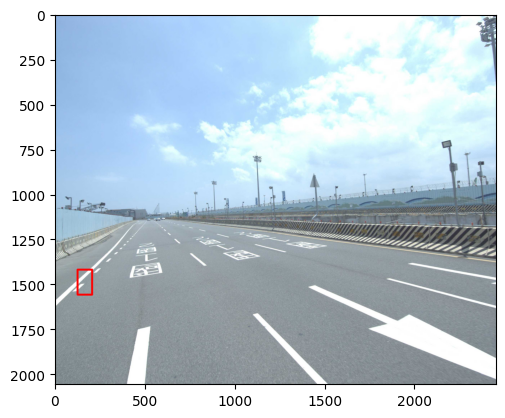

In [ ]:
tmp = detected_image.nms_filtering(.1)
img = tmp.draw_box("blue", thickness=10, score_thr=.7)
plt.imshow(img)

140674809952672
140674809952672


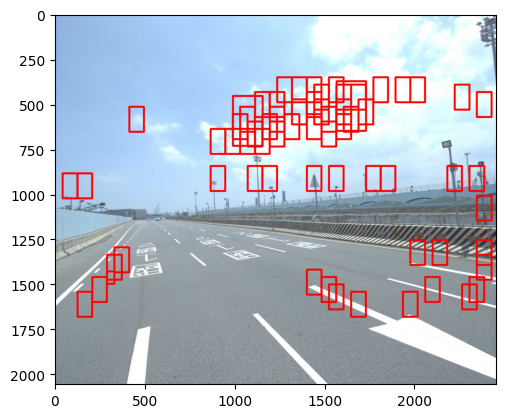

In [ ]:
tmp = detected_image.nms_filtering(.3)
print(id(tmp._ref_image))
print(id(detected_image._ref_image))
img = tmp.draw_box("green", thickness=10, score_thr=.7)
plt.imshow(img)

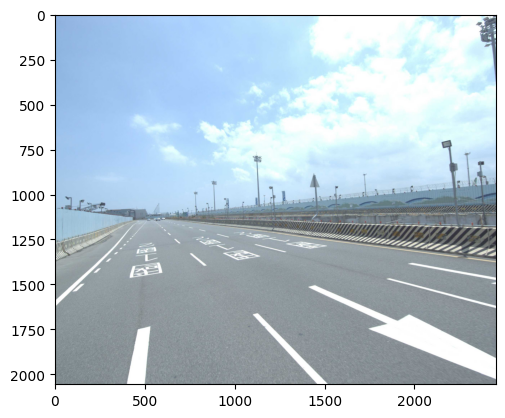

In [ ]:
img = gts[0].draw_box("green", thickness=10)
plt.imshow(img)